Campaign for selling personal loans
------------------------------------------------------


This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.


The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.


The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

Data details

ID	Customer ID							
Age              Customer's age in completed years							
Experience	     #years of professional experience							
Income	          Annual income of the customer ($000)							
ZIPCode          	Home Address ZIP code.							
Family	           Family size of the customer							
CCAvg	           Avg. spending on credit cards per month ($000)							
Education	       Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
Mortgage     	   Value of house mortgage if any. ($000)							
Personal Loan   	Did this customer accept the personal loan offered in the last campaign?							
Securities Account	Does the customer have a securities account with the bank?							
CD Account      	Does the customer have a certificate of deposit (CD) account with the bank?							
Online             	Does the customer use internet banking facilities?							
CreditCard      	Does the customer use a credit card issued by UniversalBank?	

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
cust=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
cust

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [3]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
#Negative values in Experience. On looking closely, it looks like the typo error in data
#as corresponding age and experience goes well with the positive values. Making values positive
cust["Experience"]=cust["Experience"].abs()


In [85]:
#dropping zip code as it's not required
cust = cust.drop("ZIP Code", axis=1)
cust = cust.drop("ID", axis=1)
cust.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.415189,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


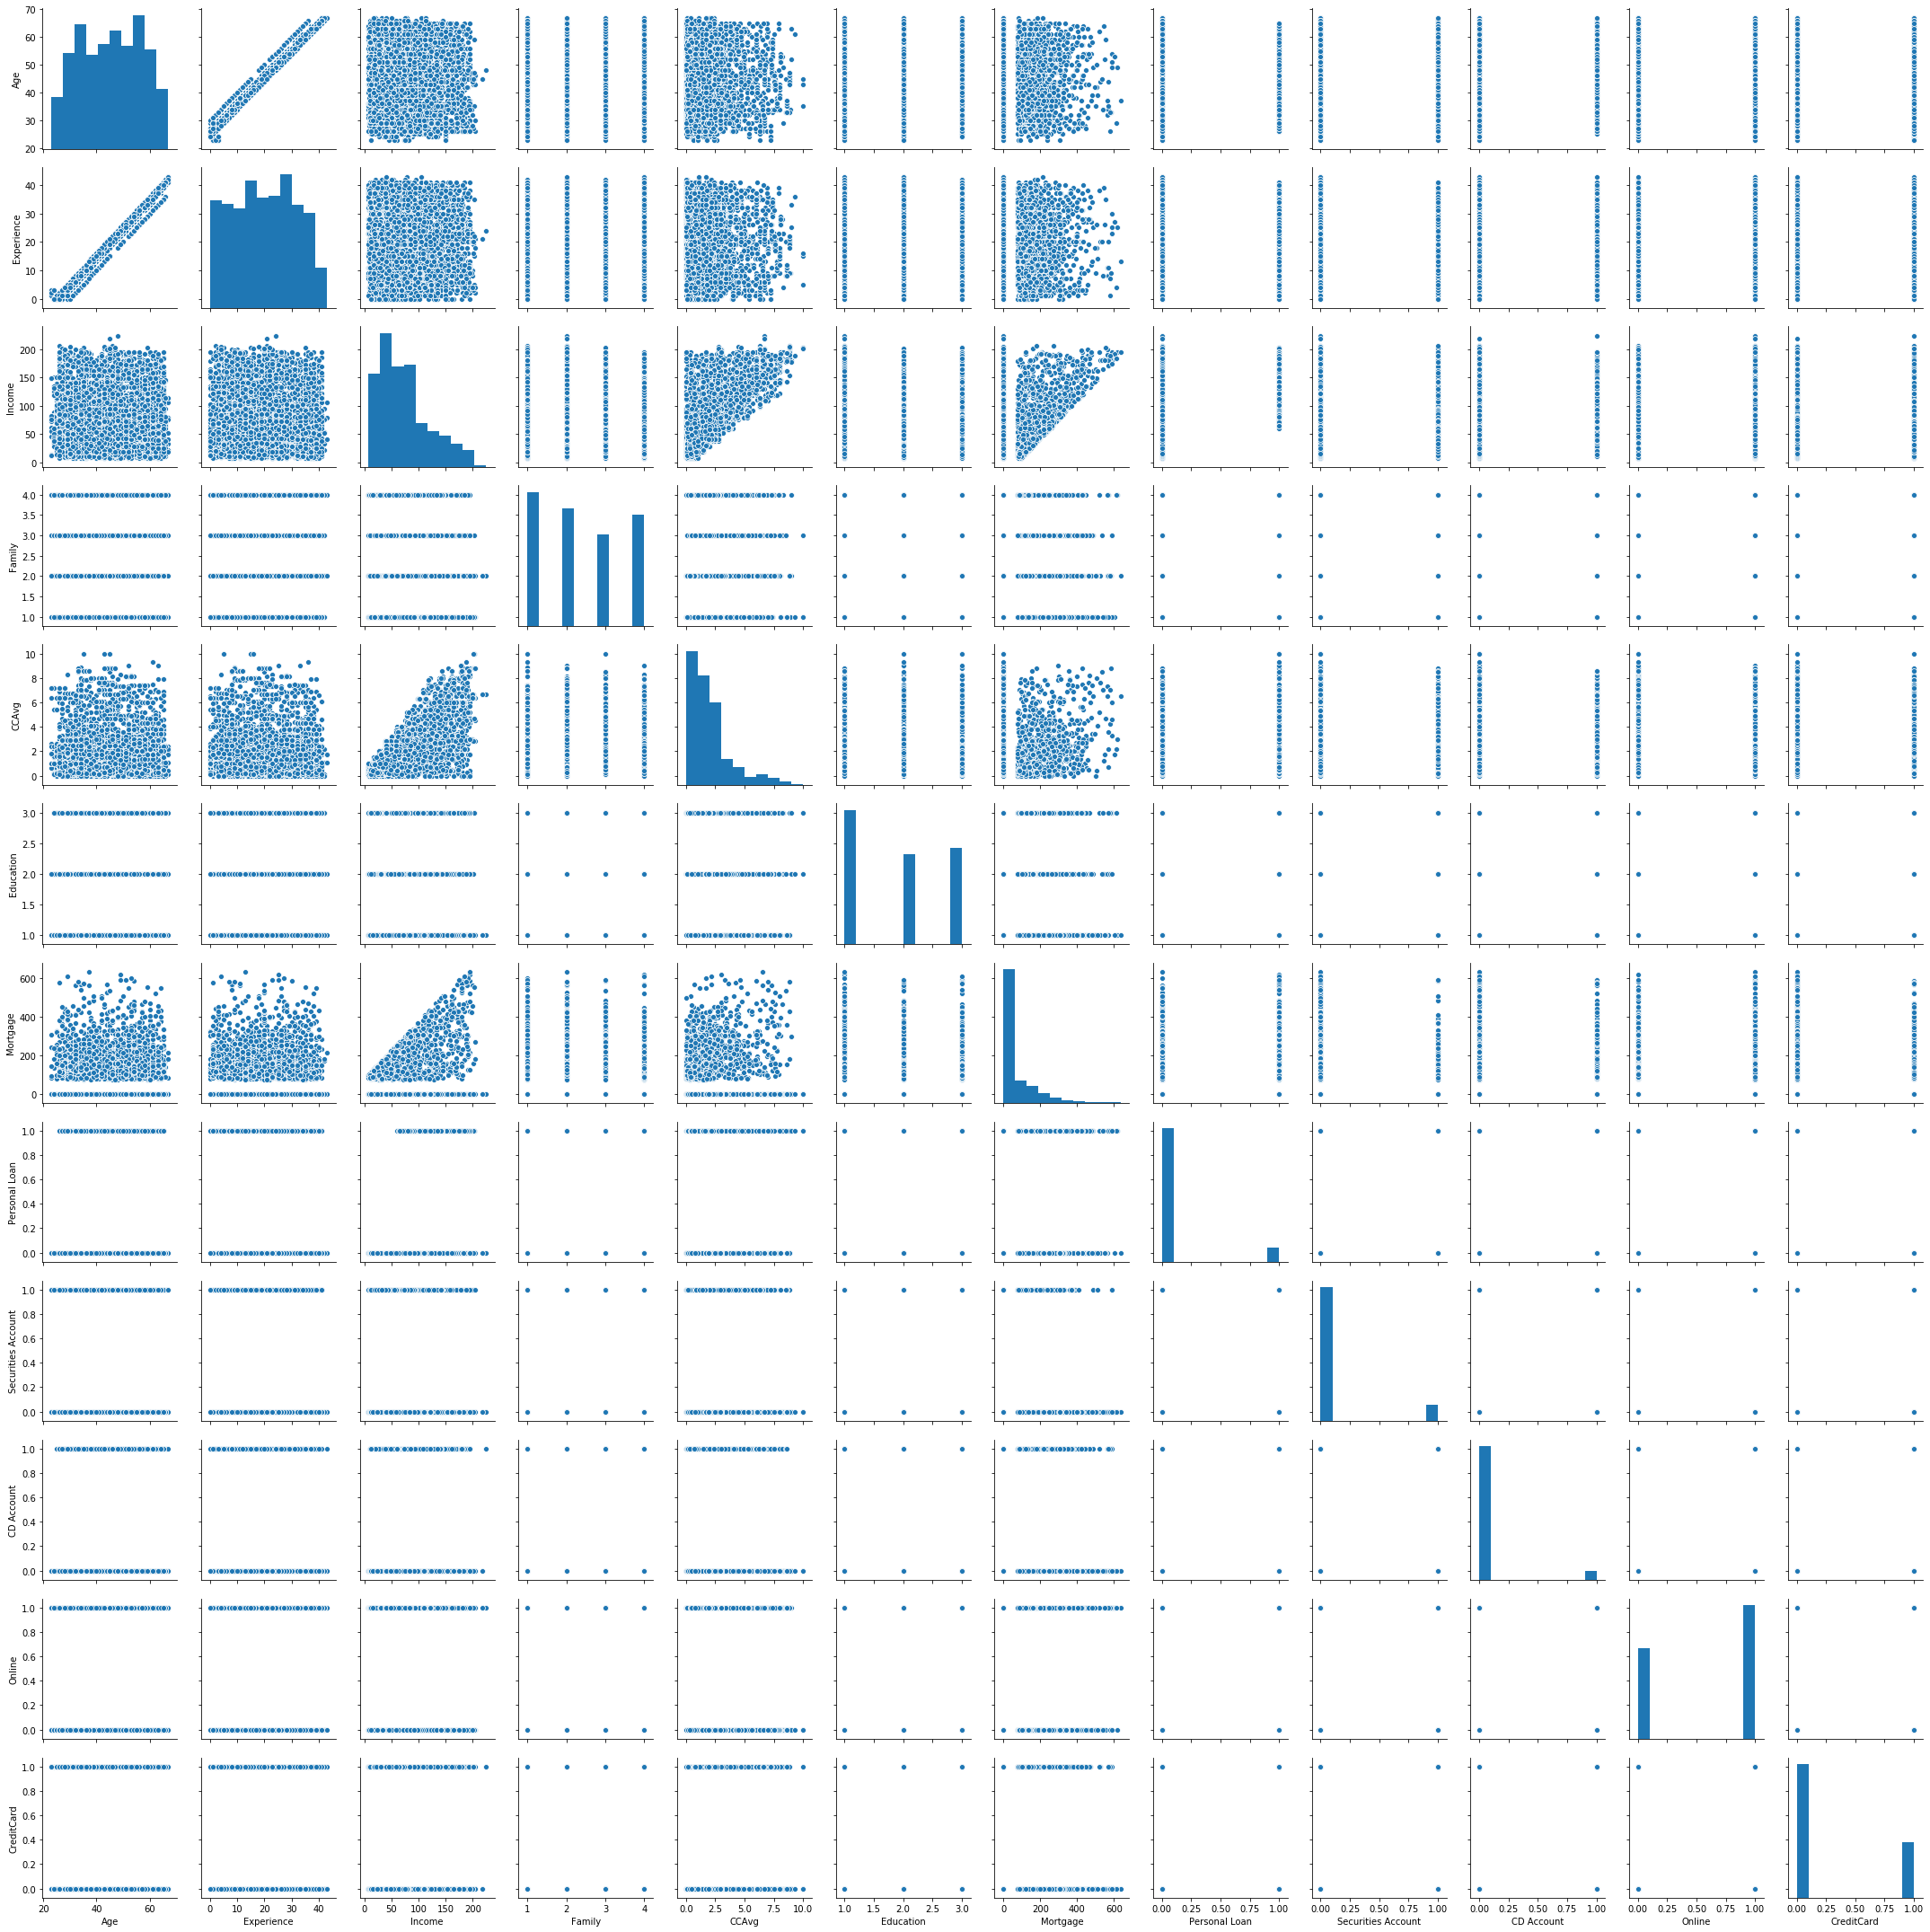

In [86]:
sns.pairplot(cust)

In [87]:
print(cust.isnull().sum())


Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


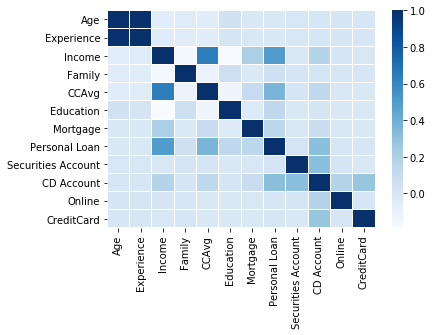

In [88]:
sns.heatmap(cust.corr(),linewidths=.01, cmap="Blues")


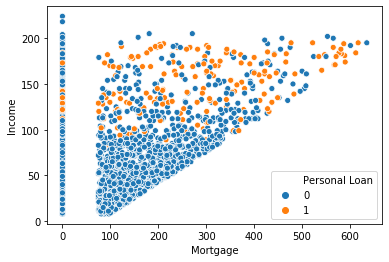

In [89]:
sns.scatterplot(x="Mortgage", y="Income", data=cust, hue="Personal Loan")

It looks like Personal loan is accepted by more people having income greater than 100 

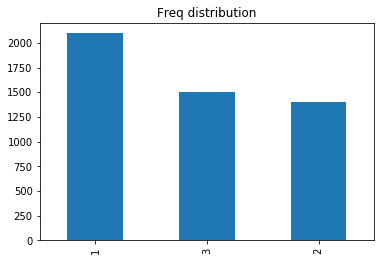

In [90]:
#Categorirical variables analysis

cust.groupby(["Education"]) ["Education"].count()
cust["Education"].value_counts().plot.bar(title='Freq distribution')


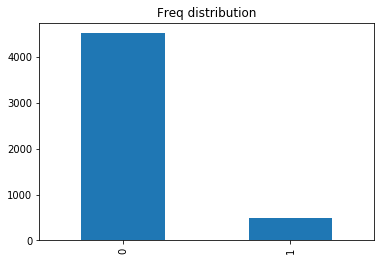

In [91]:
cust["Personal Loan"].value_counts().plot.bar(title='Freq distribution')

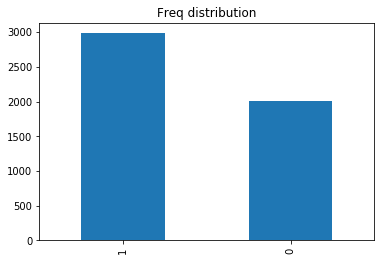

In [92]:
cust["Online"].value_counts().plot.bar(title='Freq distribution')

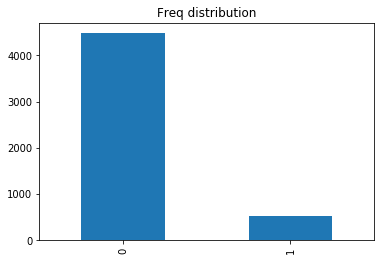

In [93]:
cust["Securities Account"].value_counts().plot.bar(title='Freq distribution')


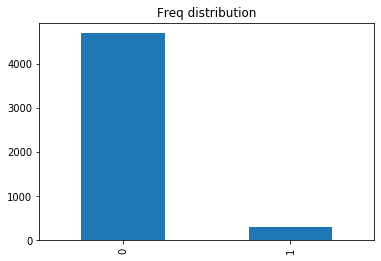

In [28]:
cust["CD Account"].value_counts().plot.bar(title='Freq distribution')

In [114]:
# Dividing the data in test and train sets
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# Segregating dependent and independent variables
X=cust.drop('Personal Loan',axis=1,inplace=False)
y=cust[['Personal Loan']]
test_size = 0.30 
seed = 3
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)


In [115]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("Accuracy : ",+model_score)
print("F1_score: ",+metrics.f1_score(y_test, y_predict, average='micro'))
print(metrics.classification_report(y_test, y_predict))
print("\nconfusion matrix\n",+metrics.confusion_matrix(y_test, y_predict))

Accuracy :  0.9486666666666667
F1_score:  0.9486666666666667
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1349
           1       0.79      0.66      0.72       151

    accuracy                           0.95      1500
   macro avg       0.88      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500


confusion matrix
 [[1323   26]
 [  51  100]]


d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print("Accuracy:", metrics.accuracy_score(y_test, predicted))
print("\nconfusion matrix\n",+metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1349
           1       0.44      0.62      0.52       151

    accuracy                           0.88      1500
   macro avg       0.70      0.76      0.73      1500
weighted avg       0.90      0.88      0.89      1500

Accuracy: 0.884

confusion matrix
 [[1233  116]
 [  58   93]]


d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
##Tested with n_neighbors as 2,3,4,5,6,7,8

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report, confusion_matrix
print("\nconfusion matrix\n",+confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9586666666666667

confusion matrix
 [[1339   10]
 [  52   99]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1349
           1       0.91      0.66      0.76       151

    accuracy                           0.96      1500
   macro avg       0.94      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Conclusion

It looks like both Logistic regression and KNN are providing high accuracy with KNN accuracy slightly higher
than logistic regression. 
For KNN, level 3 is showing highest accuracy
Comparing Logistic regression and KNN, KNN has got slightly higher precision and recall for Personal loan flag =1 which means results are more complete and it's a win win situation for. We will prefer using KNN here. 